In [4]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['scikit-learn'])
await piplite.install(['seaborn'])

Import libraries:


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
#download the dataset into browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.

In [8]:
await download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv','module_5_auto.csv')

In [9]:
df = pd.read_csv("module_5_auto.csv", header=0)

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


First, let's only use numeric data:


In [11]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Let's remove the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models.


In [12]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Libraries for plotting:


In [13]:
%pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for Plotting</h2>


In [14]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [15]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
#training data 
#testing data 
# lr:  linear regression object 
#poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1"> Training and Testing</h2>


In [16]:
y_data = df['price']
x_data=df.drop('price',axis=1)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 21
Number of training samples: 180


Split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. 


In [18]:
# Write your code below and press Shift+Enter to execute 
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.4, random_state=1)
print("Number of test samples is", x_test.shape[0])
print("Number of training samples is", x_train.shape[0])

Number of test samples is 81
Number of training samples is 120


In [19]:
#Import LinearRegression
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [20]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [21]:
print("R^2 of the test data:", lre.score(x_test[['horsepower']], y_test))

R^2 of the test data: 0.6111827529454426


In [23]:
print("R^2 of the training data:",lre.score(x_train[['horsepower']], y_train))

R^2 of the training data: 0.6755325771980133


The R^2 is much smaller using the test data compared to the training data.

Test data using 40% of the dataset for testing.



In [24]:
x_train1, x_test1, y_train1, y_test1=train_test_split(x_data, y_data, test_size=0.4, random_state=1)
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.6111827529454426

<h2>Cross-Validation Score</h2>


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220099150421197 and the standard deviation is 0.29118394447560203


In [27]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.26505171, 12539630.34014929,
       17561927.72247586])

<h2 id="ref2"> 2. Overfitting, Underfitting and Model Selection</h2>

Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [28]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [29]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([26091.37901214,  7954.34606626, 26091.37901214, 19557.5951667 ,
        5822.61408773])

Prediction using test data:


In [30]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11353.32523898,  5751.32764209, 11187.28797374,  6595.61698627,
       15737.79921748])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The distribution of the predicted values of the training data.


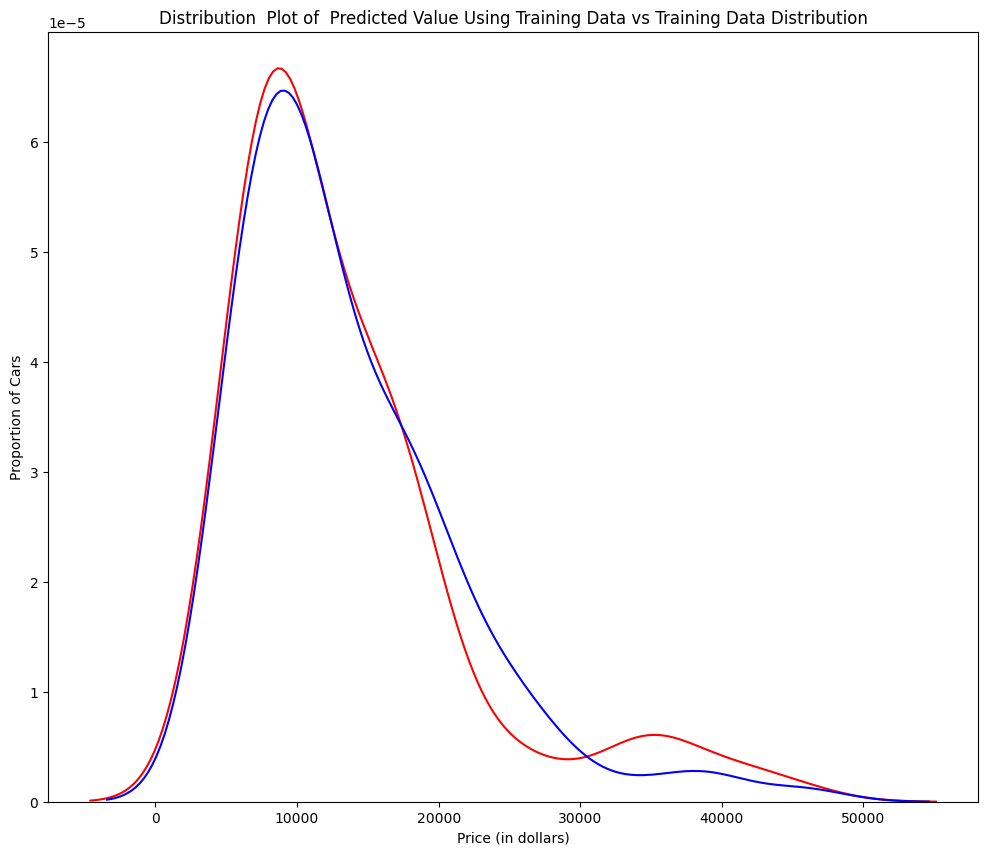

In [32]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


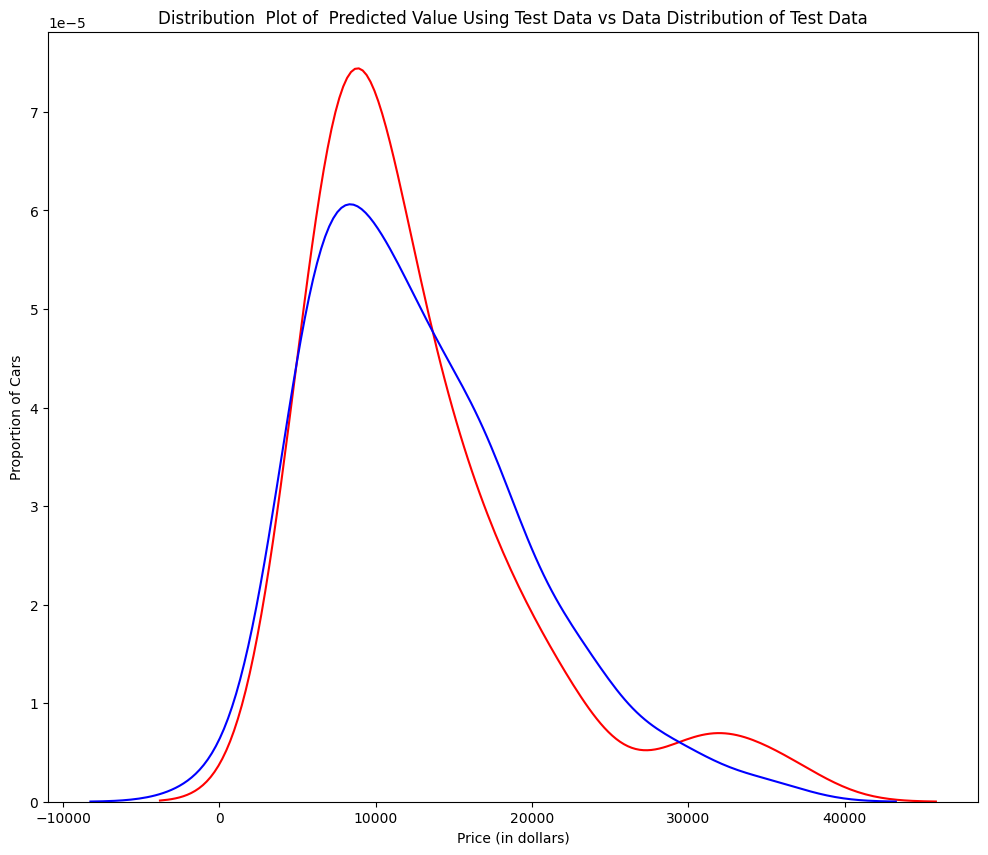

In [33]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [34]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Create a degree 5 polynomial model, use 55 percent of the data for training and the rest for testing.</p>


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [36]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [37]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [38]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.58641321,  7307.91998787, 12213.73753589, 18893.37919224,
       19996.10612156])

In [39]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.58641321  7307.91998787 12213.73753589 18893.37919224]
True values: [ 6295. 10698. 13860. 13499.]


Use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


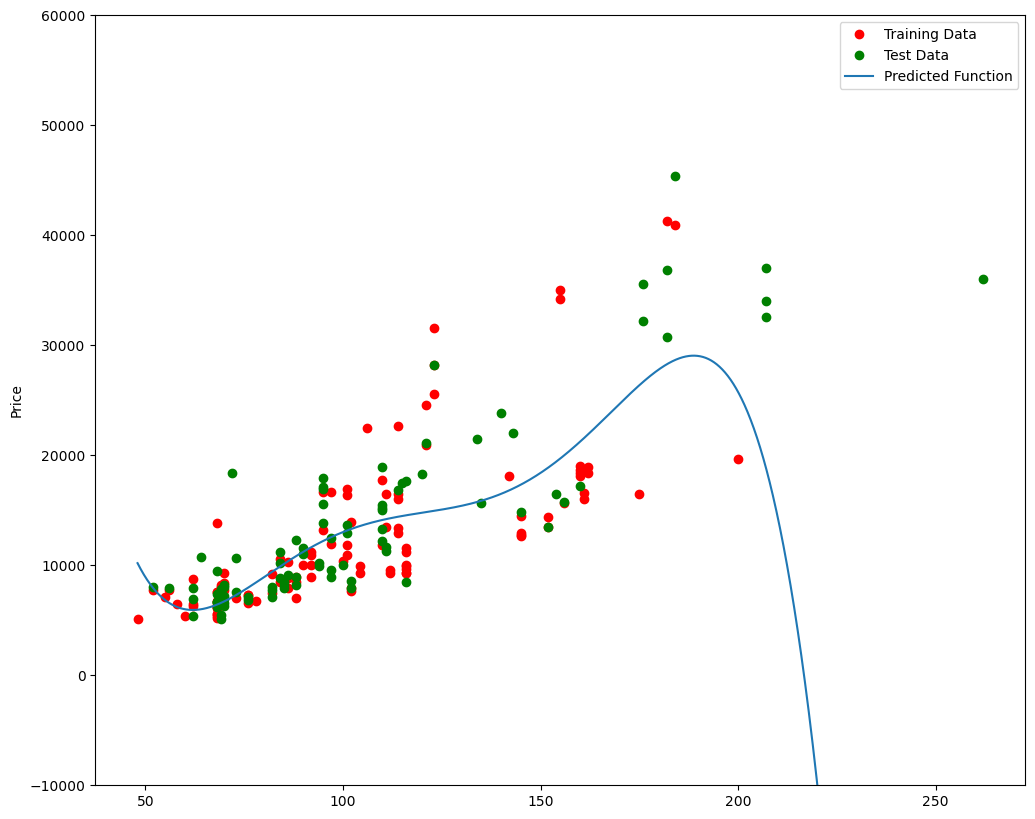

In [40]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data:


In [41]:
print("R^2 of the training data:",poly.score(x_train_pr, y_train))

R^2 of the training data: 0.5567716897754004


R^2 of the test data:


In [42]:
print("R^2 of the test data:", poly.score(x_test_pr, y_test))

R^2 of the test data: -29.87099623387278


We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

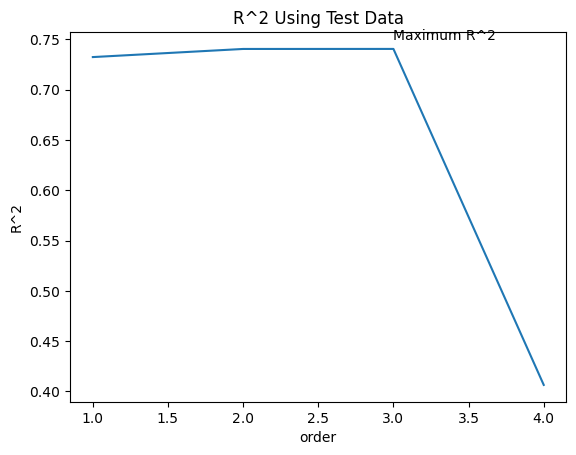

In [43]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


In [44]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Experiment with different polynomial orders and different amounts of data.


In [45]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [46]:
pr1=PolynomialFeatures(degree=2)


<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [47]:
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']])   

In [48]:
x_train_pr.shape

(110, 70)

In [49]:
poly1=LinearRegression()
poly1.fit(x_train_pr, y_train)

LinearRegression()

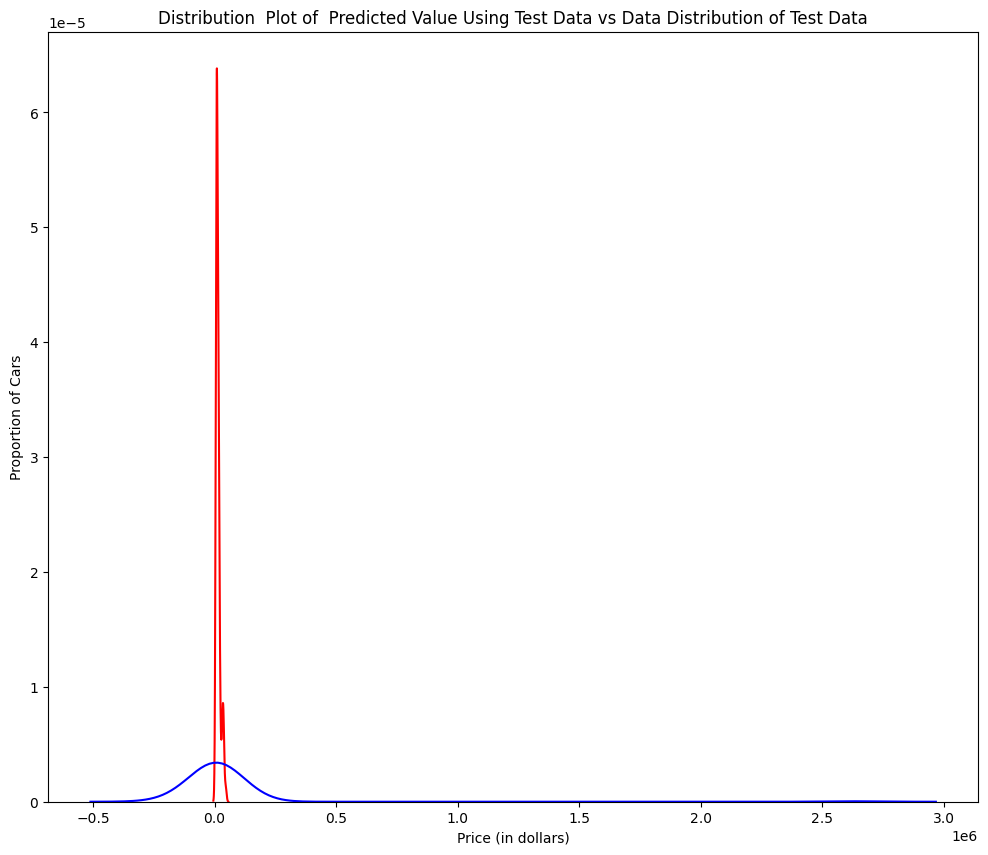

In [50]:
yhat=poly1.predict(x_test_pr)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat,"Actual Values (Test)","Predicted Values (Test)",Title)

The predicted value is higher than actual value for cars where the price 10,000 dollars range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 dollars range. As such the model is not as accurate in these ranges.

<h2 id="ref3">3. Ridge Regression</h2> 


In [51]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [52]:
from sklearn.linear_model import Ridge

In [70]:
RigeModel=Ridge(alpha=1)

In [71]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [72]:
yhat = RidgeModel.predict(x_test_pr)

In [73]:
print('Predicted:', yhat[0:4])
print('Test set :', y_test[0:4].values)

Predicted: [ 5608.10799771  9232.54262439 21062.23678396 21001.23447115]
Test set : [ 6295. 10698. 13860. 13499.]


Select the value of alpha that minimizes the test error and create a progress bar to see how many iterations we have completed so far.


In [74]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:06<00:00, 165.45it/s, Test Score=0.564, Train Score=0.859]


Plot out the value of R^2 for different alphas:


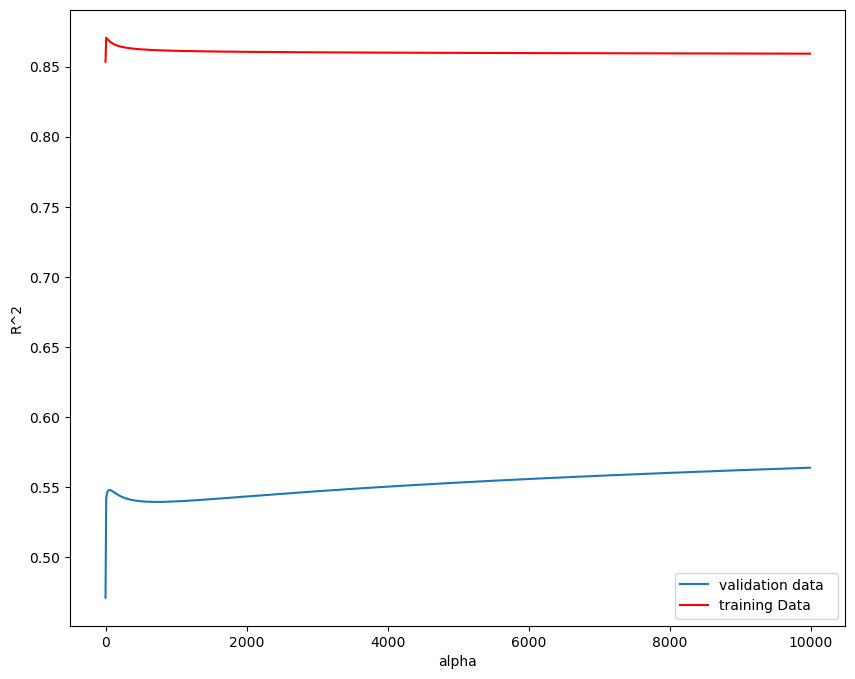

In [75]:
width = 10
height = 8
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


Use the training data to train the model and use the test data to test the model. The parameter alpha is set to 10.


In [76]:
RidgeModel1=Ridge(alpha=10)
RidgeModel1.fit(x_train_pr, y_train)
RidgeModel1.score(x_test_pr, y_test)

0.5418576440208995

<h2 id="ref4">4. Grid Search</h2>


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


In [77]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [78]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [79]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [80]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)


Fit the model:


In [81]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [82]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

We now test our model on the test data:


In [83]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152


Perform a grid search to find the best alpha value and check if using feature scaling improves the model.
</div>


In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x_data[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])

parameter2 = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]

Grid2=GridSearchCV(Ridge(), parameter2, cv=4)
Grid2.fit(x_scaled, y_data)
print(Grid2.score(x_scaled, y_data))

bestmodel = Grid2.best_estimator_
best_alpha = Grid2.best_params_['alpha']
print("Best alpha:", best_alpha

0.7835860389195837


100.0

<details><summary>Click here for the solution</summary>

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# Define parameter grid without 'normalize'
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

# Perform Grid Search
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_scaled, y_data)

# Best model
best_ridge_model = Grid2.best_estimator_
best_alpha = Grid2.best_params_['alpha']
best_alpha

```

</details>
